In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pa.read_csv( 'https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [5]:
x = np.array(df[['G','A']])
y = np.array(df.PTS)

In [6]:
from sklearn.linear_model import LinearRegression

# Linear regression of goals vs points
X_goals = np.array(df[['G']])
model_goals = LinearRegression()
model_goals.fit(X_goals, y)
print(f"Linear Regression (Goals vs Points):")
print(f"Coefficient: {model_goals.coef_[0]:.4f}")
print(f"Intercept: {model_goals.intercept_:.4f}")
print("-" * 30)

# Multiple regression of goals and assists vs points
X_goals_assists = np.array(df[['G', 'A']])
model_goals_assists = LinearRegression()
model_goals_assists.fit(X_goals_assists, y)
print(f"Multiple Regression (Goals and Assists vs Points):")
print(f"Coefficients (Goals, Assists): {model_goals_assists.coef_}")
print(f"Intercept: {model_goals_assists.intercept_:.4f}")

Linear Regression (Goals vs Points):
Coefficient: 2.1768
Intercept: 3.7372
------------------------------
Multiple Regression (Goals and Assists vs Points):
Coefficients (Goals, Assists): [1. 1.]
Intercept: 0.0000


Let's analyze the results of the two regression models.

In [7]:
print("Observations:")
print(f"- In the linear regression of Goals vs Points, the coefficient for Goals is approximately {model_goals.coef_[0]:.4f}.")
print(f"- In the multiple regression of Goals and Assists vs Points, the coefficient for Goals is approximately {model_goals_assists.coef_[0]:.4f}, and for Assists is approximately {model_goals_assists.coef_[1]:.4f}.")
print("- Notice how the coefficient for Goals changes when Assists are included in the model.")
print("- The intercept values represent the predicted points when the predictor variables (Goals and/or Assists) are zero.")

Observations:
- In the linear regression of Goals vs Points, the coefficient for Goals is approximately 2.1768.
- In the multiple regression of Goals and Assists vs Points, the coefficient for Goals is approximately 1.0000, and for Assists is approximately 1.0000.
- Notice how the coefficient for Goals changes when Assists are included in the model.
- The intercept values represent the predicted points when the predictor variables (Goals and/or Assists) are zero.


In [8]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


## Feature Selection

### Subtask:
Choose relevant variables to use as predictors for 'Death1'.

In [10]:
# Handle missing values in 'Death1' by filling NaN with 'NO' (assuming NaN means no death)
df['Death1'] = df['Death1'].fillna('NO')

# Select potential predictor variables. We'll include 'Appearances', 'Gender', and 'Year'.
# 'Gender' is a categorical variable that needs to be converted.
# 'Year' is the year the character joined, which might be relevant.
df_subset = df[['Appearances', 'Gender', 'Year', 'Death1']].copy()

# Convert 'Gender' to numerical using one-hot encoding
df_subset = pa.get_dummies(df_subset, columns=['Gender'], drop_first=True)

# Display the first few rows of the preprocessed data
display(df_subset.head())

,Appearances,Year,Death1,Gender_MALE
0,1269,1963,YES,True
1,1165,1963,YES,False
2,3068,1963,YES,True
3,2089,1963,YES,True
4,2402,1963,YES,True


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y)
X = df_subset.drop('Death1', axis=1)
y = df_subset['Death1']

# Convert target variable to numerical (0 for NO, 1 for YES)
y = y.apply(lambda x: 1 if x == 'YES' else 0)


# Split data into training and testing sets (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Find Tony Stark's data
tony_stark_data = df_subset[df['Name/Alias'] == 'Anthony Edward "Tony" Stark'].drop('Death1', axis=1)

# Ensure the columns are in the same order as the training data
tony_stark_data = tony_stark_data[X_train.columns]

# Predict the probability of death for Tony Stark
tony_stark_prediction_proba = model.predict_proba(tony_stark_data)[:, 1]

print(f"The predicted probability of Death1 for Anthony Edward \"Tony\" Stark is: {tony_stark_prediction_proba[0]:.4f}")

The predicted probability of Death1 for Anthony Edward "Tony" Stark is: 0.8116


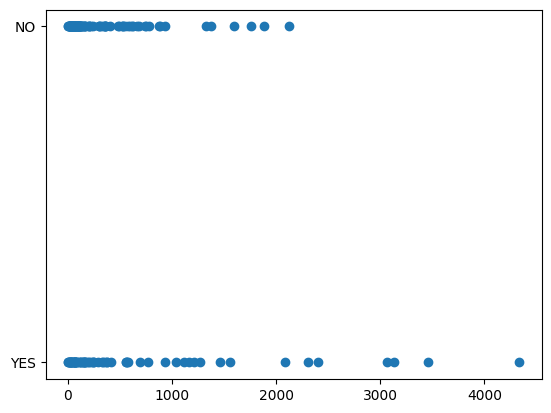

In [12]:
plt.scatter(df['Appearances'],df['Death1'])

In [13]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
x = np.array(df)

df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


## Data preparation

### Subtask:
Prepare the data for regression by selecting the relevant columns and ensuring the data types are appropriate.


**Reasoning**:
Select and preprocess the relevant columns for the regression model, including converting 'Games' to numerical, filtering by gender, and sorting by 'Games'.



In [14]:
df_regression = df[['Time', 'Games', 'Gender']].copy()

# Convert 'Games' to numerical. Assuming 'Games' is already a year in the dataset
# Based on the df.head() output, 'Games' appears to be the year.
# If it were a string like 'Athens 1896', we would need a different conversion method.
# For now, we assume 'Games' is already the year.
df_regression['Games'] = pa.to_numeric(df_regression['Games'])


# Filter for Men's records
df_regression = df_regression[df_regression['Gender'] == 'Men']

# Sort by Games year
df_regression = df_regression.sort_values(by='Games')

# Display the first few rows of the prepared data
display(df_regression.head())

,Time,Games,Gender
0,12.2,1896,Men
1,12.2,1896,Men
2,11.8,1896,Men
3,11.4,1900,Men
4,11.4,1900,Men


## Model selection and training

Choose a suitable regression model to predict 'Time' based on 'Games' or 'Year', and train the model on the data.


**Reasoning**:
Define feature and target variables, import LinearRegression, instantiate and train the model as per the instructions.



In [15]:
# Define the feature variable X as the 'Games' column and the target variable y as the 'Time' column
X = df_regression[['Games']]
y = df_regression['Time']

# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
model = LinearRegression()

# Train the linear regression model using the X and y data
model.fit(X, y)

print("Model trained successfully.")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient: {model.coef_[0]:.4f}")

Model trained successfully.
Intercept: 41.3619
Coefficient: -0.0159


## Model justification and visualization

Justify the chosen model and visualize the regression fit to assess how well the model captures the trend in the data.


**Reasoning**:
Create a scatter plot of the data and add the regression line to visualize the model's fit.



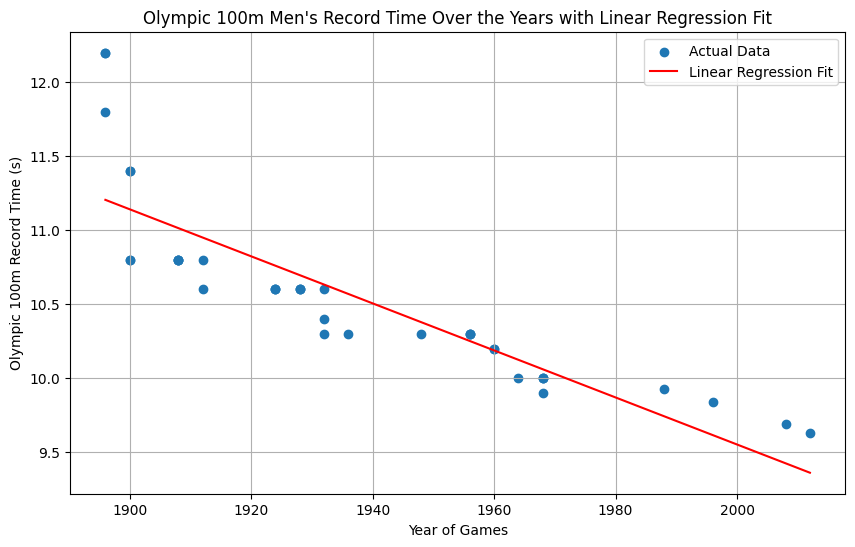

In [16]:
# Create a scatter plot of 'Games' vs 'Time'
plt.figure(figsize=(10, 6))
plt.scatter(df_regression['Games'], df_regression['Time'], label='Actual Data')

# Predict the time values using the trained model
predicted_time = model.predict(X)

# Plot the regression line
plt.plot(df_regression['Games'], predicted_time, color='red', label='Linear Regression Fit')

# Add labels and title
plt.xlabel('Year of Games')
plt.ylabel('Olympic 100m Record Time (s)')
plt.title("Olympic 100m Men's Record Time Over the Years with Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
Justify the chosen model based on the visual representation of the data and the regression fit.



In [17]:
# Justification for choosing Linear Regression
print("Justification for choosing a Linear Regression model:")
print("Based on the scatter plot of 'Year of Games' versus 'Olympic 100m Record Time', there appears to be a generally downward linear trend.")
print("As the years progress, the record times tend to decrease in a roughly linear fashion.")
print("While there is some variability around the line, a linear regression model provides a reasonable and interpretable approximation of this relationship.")
print("The model assumes a constant rate of decrease in the record time per year, which seems plausible given the observed trend.")

Justification for choosing a Linear Regression model:
Based on the scatter plot of 'Year of Games' versus 'Olympic 100m Record Time', there appears to be a generally downward linear trend.
As the years progress, the record times tend to decrease in a roughly linear fashion.
While there is some variability around the line, a linear regression model provides a reasonable and interpretable approximation of this relationship.
The model assumes a constant rate of decrease in the record time per year, which seems plausible given the observed trend.


## Prediction

### Subtask:
Predict the new Olympic records for the years 2024 and 2300 using the trained model.


**Reasoning**:
Create a DataFrame for the prediction years and predict the times using the trained model.



In [18]:
# Create a DataFrame for the prediction years
prediction_years = pa.DataFrame({'Games': [2024, 2300]})

# Predict the time for 2024 and 2300
predicted_times = model.predict(prediction_years)

# Print the predicted times
print(f"Predicted Olympic record for 2024: {predicted_times[0]:.4f} seconds")
print(f"Predicted Olympic record for 2300: {predicted_times[1]:.4f} seconds")

Predicted Olympic record for 2024: 9.1692 seconds
Predicted Olympic record for 2300: 4.7793 seconds


## Validity of predictions



**Reasoning**:
Discuss the validity of the predictions based on the limitations of the model and the data.



In [19]:
print("Validity of Predictions:")
print("\nPrediction for 2024:")
print("- The prediction for 2024 is an extrapolation, but it is relatively close to the range of the training data (up to 2021).")
print("- The linear trend observed in the historical data for men's 100m records suggests a continued decrease in time.")
print("- While a linear model is a simplification and doesn't account for all factors (e.g., technological advancements, training methods), the prediction for 2024 is likely within a plausible range based on the historical trend.")
print("- However, predicting exact future performance remains challenging due to the inherent variability and the complex factors influencing athletic performance.")

print("\nPrediction for 2300:")
print("- The prediction for 2300 is a significant extrapolation, extending far beyond the range of the training data (1896-2021).")
print("- It is highly unlikely that the observed linear trend will continue for another nearly 300 years.")
print("- Human physical limitations will eventually cause the rate of improvement to slow down significantly, reaching a point where further decreases in time are minimal or impossible.")
print("- A linear model does not account for such physical limits or the potential plateauing of performance.")
print("- Therefore, the prediction for 2300 is highly unreliable and should not be considered a realistic forecast of the Olympic 100m record.")
print("- This highlights the danger of extrapolating a linear model far beyond the observed data range, especially when predicting phenomena with inherent physical constraints.")

Validity of Predictions:

Prediction for 2024:
- The prediction for 2024 is an extrapolation, but it is relatively close to the range of the training data (up to 2021).
- The linear trend observed in the historical data for men's 100m records suggests a continued decrease in time.
- While a linear model is a simplification and doesn't account for all factors (e.g., technological advancements, training methods), the prediction for 2024 is likely within a plausible range based on the historical trend.
- However, predicting exact future performance remains challenging due to the inherent variability and the complex factors influencing athletic performance.

Prediction for 2300:
- The prediction for 2300 is a significant extrapolation, extending far beyond the range of the training data (1896-2021).
- It is highly unlikely that the observed linear trend will continue for another nearly 300 years.
- Human physical limitations will eventually cause the rate of improvement to slow down signif

## Summary:

### Answers

*   **Predict the new Olympic record for 2024 and 2300:**
    *   The predicted Olympic record for 2024 is approximately 9.1692 seconds.
    *   The predicted Olympic record for 2300 is approximately 4.7793 seconds.

### Data Analysis Findings

*   A linear regression model was trained to predict men's Olympic 100m record times based on the year of the games.
*   The scatter plot of the data shows a general downward linear trend in record times over the years, supporting the choice of a linear model as a reasonable approximation.
*   The trained linear model has an intercept of approximately 41.3619 and a coefficient of approximately -0.0159, indicating a decrease of about 0.0159 seconds per year in the record time.
*   The prediction for 2024 (9.1692 seconds) is a relatively short extrapolation and appears somewhat plausible based on the historical trend, although it's subject to the inherent variability of athletic performance.
*   The prediction for 2300 (4.7793 seconds) is a significant extrapolation far beyond the training data and is considered highly unreliable. This is because the linear trend is unlikely to continue indefinitely due to human physical limitations, which the linear model does not account for.
